**<font size = 5 color = black></font>**


**<font size = 5>线性回归</font>**

**1** 以一元线性回归为例，介绍其基本原理

**2** 介绍两种一元线性回归模型参数的求解方法：**梯度下降法**和**最小二乘法**

**3** 通过简单例子，对比分析本文算法与sklearn的结果

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

**<font size=4>1 一元线性回归</font>**

**<font size=3.5>1.1 函数模型</font>**
$$ y = \theta_0 x_0 + \theta_1 x_1,x_0 = 1\tag{1}$$

矩阵表示：
$$ \mathop{\boldsymbol y}\limits_{m \times 1} =  \mathop{\boldsymbol X}\limits_{m \times n} \mathop{\boldsymbol \theta}\limits_{n \times 1} \tag{2}$$

**<font size=3.5>1.2 损失函数</font>**

平方损失函数:
$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m [ h_\theta (x^{(i)}) - y^{(i)}]^2\tag{3}$$
$$ h_\theta (x^{(i)}) = \theta_0 + \theta_1 x^{(i)} $$


矩阵表示：$ J(\boldsymbol \theta) = \frac{1}{2m} (\boldsymbol X \boldsymbol \theta - \boldsymbol y)^T (\boldsymbol X \boldsymbol \theta - \boldsymbol y) \tag{4}$

In [2]:
def linear_loss(theta, X, y):
    """计算损失
    Parameters
    ----------
    theta: ndarray of shape (1+n_features, 1)
    X: ndarray of shape (n_samples, 1+n_features)
    y: ndarray of shape (n_samples, 1)

    Returns
    -------
    loss: float
    """
    m = np.shape(X)[0]
    diff = X.dot(theta) - y
    loss = 1 / (2 * m) * diff.T.dot(diff)
    return loss[0][0]

**<font size=4>2 模型参数求解方法</font>**

**<font size=3.5>2.1 梯度下降法</font>**

计算梯度：
$$ \frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^m [h_\theta (x^{(i)})-y^{(i)}] x_j^{(i)}\tag{5}$$

矩阵表示：
$$ \nabla J(\boldsymbol \theta) = \frac{1}{m} \boldsymbol X^T (\boldsymbol X \boldsymbol \theta - \boldsymbol y) \tag{6}$$

参数更新：
$$ \theta_j^k = \theta_j^{k-1} - \eta J^{'}(\theta_j^{k-1}) \tag{7}$$

矩阵表示：
$$ \boldsymbol \theta^k  = \boldsymbol \theta^{k-1} - \eta \nabla J(\boldsymbol \theta^{k-1}) \tag{8} $$

In [3]:
def linear_grad(theta, X, y):
    """计算梯度
    Parameters
    ----------
    theta: ndarray of shape (1+n_features, 1)
    X: ndarray of shape (n_samples, 1+n_features)
    y: ndarray of shape (n_samples, 1)

    Returns
    -------
    grad: ndarray of shape (1+n_features, 1)
    """
    m = np.shape(X)[0]
    diff = X.dot(theta) - y
    grad = 1 / m * X.T.dot(diff)
    return grad

In [4]:
def gradient_descent(X, y, initial_theta, eta, max_iter=10000, tol=1e-4):
    """批量梯度下降法（FG）
    Parameters
    ----------
    X: ndarray of shape (n_samples, 1+n_features)
    y: ndarray of shape (n_samples, 1)
    initial_theta: ndarray of shape (1+n_features, 1) theta的初始值 
    eta: float 学习率
    max_iter: int 最大迭代次数 
    tol: float 梯度的阈值

    Returns
    -------
    theta: ndarray of shape (1+n_features, 1) theta的求解结果
    theta0_path: list theta0更新列表
    theta1_path: list theta1更新列表
    loss_path: list loss更新列表
    """
    theta = initial_theta
    cur_iter = 1
    theta0_path = []  # theta0值的变化列表
    theta1_path = []  # theta1值的变化列表
    loss_path = []  # 损失函数值的变化列表
    theta0_path.append(theta[0][0])  # 存储初始theta0值
    theta1_path.append(theta[1][0])  # 存储初始theta1值
    loss_path.append(linear_loss(theta, X, y))  # 存储初始损失函数值

    while cur_iter <= max_iter:
        grad = linear_grad(theta, X, y)
        theta = theta - eta * grad
        theta0_path.append(theta[0][0])
        theta1_path.append(theta[1][0])
        loss_path.append(linear_loss(theta, X, y))
        if all(abs(grad) < tol):
            break
        cur_iter += 1

    return theta, theta0_path, theta1_path, loss_path

**<font size=3.5>2.2 最小二乘法</font>**

模型参数的估计值：
$$ \hat{\boldsymbol \theta}  = (\boldsymbol X^T \boldsymbol X)^{-1} \boldsymbol X^T \boldsymbol y \tag{9}$$

In [5]:
def least_square(X, y):
    """最小二乘法
    Parameters
    ----------
    X: ndarray of shape (n_samples, 1+n_features)
    y: ndarray of shape (n_samples, 1)

    Returns
    -------
    out: ndarray of shape (1+n_features, 1) 参数求解结果
    """
    return np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))

**<font size=4>3 案例</font>**

In [6]:
# 数据准备
x0 = np.ones((20, 1))
x1 = np.arange(1, 21).reshape(20, 1)
X = np.hstack((x0, x1))  # 合并x0和x1以适应前述公式的矩阵运算
y = np.array([3, 4, 5, 5, 2, 4, 7, 8, 11, 8, 12,
              11, 13, 13, 16, 17, 18, 17, 19, 21]).reshape(20, 1)

In [7]:
# 本文算法-梯度下降法
initial_theta = np.array([0.2, 0.2]).reshape(2, 1)  # 设置theta的初始值
theta_fg, theta0_path, theta1_path, loss_path = gradient_descent(
    X, y, initial_theta, eta=0.01, max_iter=10000, tol=1e-9)
grad_fg = linear_grad(theta_fg, X, y)

print('本文算法-梯度下降法')
print('----------------')
print('第{}次迭代停止'.format(len(loss_path) - 1))
print('theta：\n', theta_fg)
print('grad：\n', grad_fg)
print('loss：\n', loss_path[-1])

本文算法-梯度下降法
----------------
第7760次迭代停止
theta：
 [[0.51578947]
 [0.96992481]]
grad：
 [[-9.95543603e-10]
 [ 7.29377447e-11]]
loss：
 1.0149624060150377


<IPython.core.display.Javascript object>


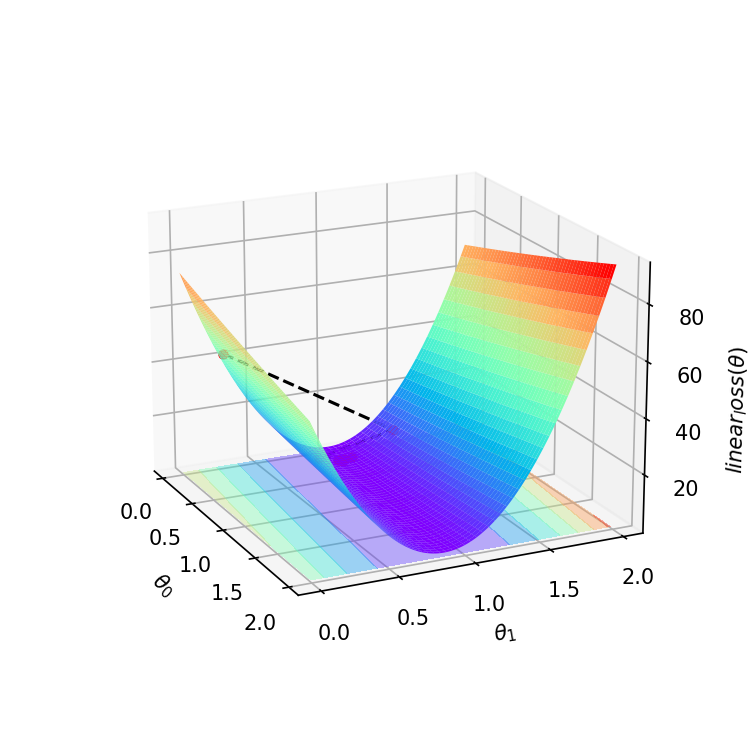

<IPython.core.display.Javascript object>


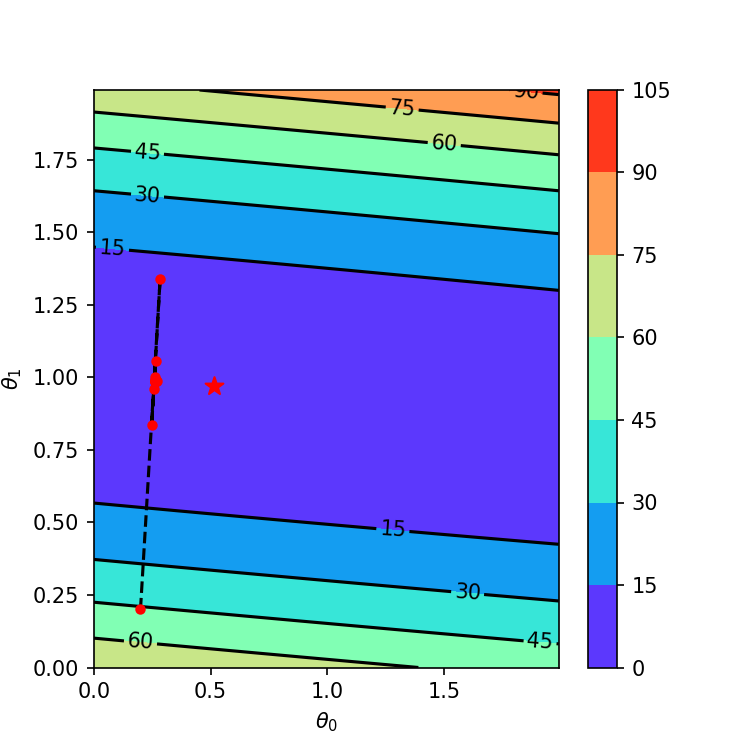

In [8]:
# 定义坐标格网（取值范围可以根据情况设定）
theta00, theta11 = np.meshgrid(
    np.arange(0, 2, 0.01), np.arange(0, 2, 0.01))
losses = np.zeros((theta00.shape[0], theta00.shape[1]))
for i in range(theta00.shape[0]):
    for j in range(theta00.shape[1]):
        theta = np.array([theta00[i][j], theta11[i][j]]).reshape(2, 1)
        losses[i][j] = linear_loss(theta, X, y)

# 梯度下降过程三维图
%matplotlib notebook
fig = plt.figure(figsize=(5, 5), dpi=100)
ax = plt.axes(projection='3d')  # 设置3D绘图模式
ax.plot_surface(theta00, theta11, losses, cmap='rainbow')  # 绘制曲面图
ax.contourf(theta00, theta11, losses, zdir='z',
            offset=0, alpha=0.4, cmap='rainbow')  # 绘制等高线图并填充
ax.plot(theta0_path[:20], theta1_path[:20], loss_path[:20],
        linestyle='--', linewidth=1.5, c='k',
        marker='o', markersize=4, markerfacecolor='r', markeredgecolor='r')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'$linear_loss(\theta)$')
ax.set_xticks(np.linspace(0, 2, 5))
ax.set_yticks(np.linspace(0, 2, 5))

# 梯度下降过程平面图
fig2 = plt.figure(figsize=(5, 5), dpi=100)
ax2 = plt.axes()
cset = ax2.contourf(theta00, theta11, losses, cmap='rainbow')
contour = ax2.contour(theta00, theta11, losses, colors='k')  # 绘制等高线
ax2.clabel(contour, fontsize=10, colors='k')  # 添加等高线注记
ax2.plot(theta0_path[:20], theta1_path[:20],
         linestyle='--', linewidth=1.5, c='k',
         marker='o', markersize=4, markerfacecolor='r', markeredgecolor='r')
ax2.scatter(theta0_path[-1], theta1_path[-1], marker='*', s=80, c='r')
ax2.set_xlabel(r'$\theta_0$')
ax2.set_ylabel(r'$\theta_1$')
plt.colorbar(cset)  # 添加色带

Figure1和Figure2是两种表达形式（三维和平面），但都是为了直观表现出梯度下降过程。<br>
红色五角星代表迭代结束后，得到的$\theta_0$和$\theta_1$的值；红色圆点代表前20次迭代的参数值；虚线代表前20次迭代过程。<br>
+ 从两个图中可以看出，20次迭代后$\theta_1$的值已经接近收敛，而$\theta_0$的值距离收敛还有一定差距，这与我们一开始所设定的初始值以及自变量本身的取值情况有关。<br>
+ 中间的几次迭代在极值点处发生了震荡，这说明所设定的学习率$\alpha$较大，可以调整$\alpha$的取值（如设置为0.001）运行代码观察新的图像。但同时，$\alpha$如果过小，则会在设定的10000次迭代后还未收敛，造成收敛速度变慢。因此，在$\alpha$的取值上需要进行多次试验，平衡精度和速度。

In [9]:
theta_ls = least_square(X, y)
loss_ls = linear_loss(theta_ls, X, y)

print('本文算法-最小二乘法')
print('----------------')
print('theta：\n', theta_ls)
print('loss：\n', loss_ls)

本文算法-最小二乘法
----------------
theta：
 [[0.51578947]
 [0.96992481]]
loss：
 1.0149624060150377


<IPython.core.display.Javascript object>


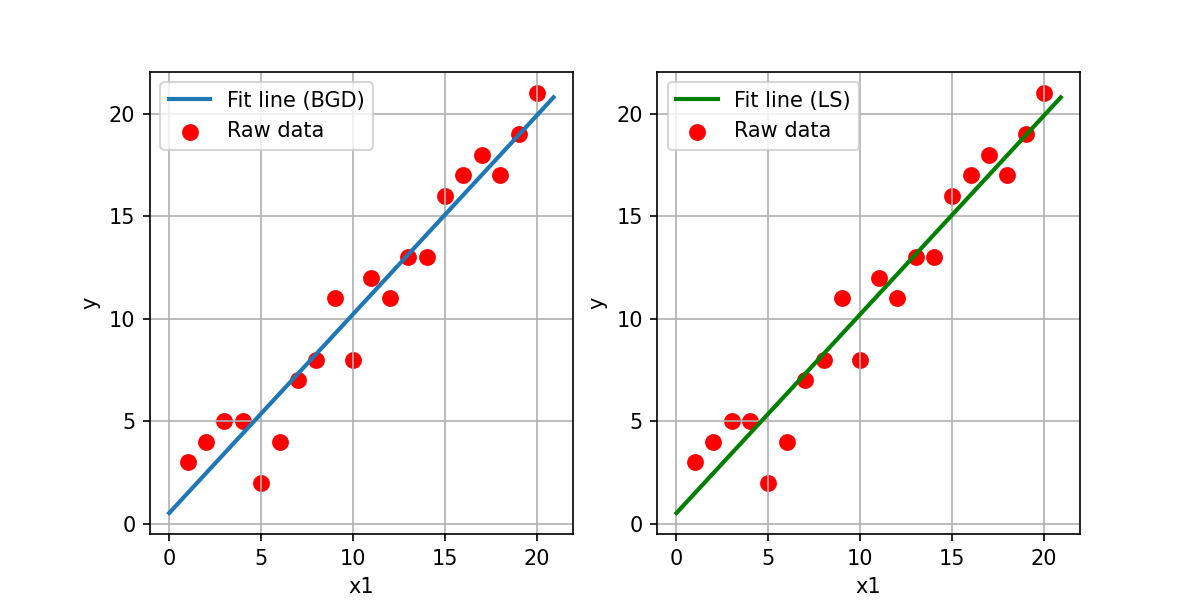

In [10]:
plt.figure(figsize=(8, 4), dpi=100)  # 设置整体画布大小和分辨率
plt.subplot(121)  # 将画布划分为1行2列，取第1个区域，即左侧区域
plt.scatter(x1, y, s=50, c='red', label='Raw data')
xx = np.arange(0, 21, 0.1)
yy1 = theta_fg[0] + theta_fg[1] * xx
plt.plot(xx, yy1, linewidth=2, label='Fit line (BGD)')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.grid()

plt.subplot(122)  # 取第2个区域，即右侧区域
plt.scatter(x1, y, s=50, c='red', label='Raw data')
yy2 = theta_ls[0] + theta_ls[1] * xx
plt.plot(xx, yy2, linewidth=2, c='green', label='Fit line (LS)')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.grid()

In [11]:
# sklearn
lin_reg = LinearRegression(fit_intercept=False)
lin_reg.fit(X, y)
pre = lin_reg.predict(X)
# score: 1-u/v, u=((y_true-y_pred)**2).sum(), v=((y_true-y_true.mean())**2).sum()

print('sklearn')
print('-------')
print('R2:', lin_reg.score(X, y))
print('r2_score:', r2_score(y, pre))  # 与reg.score得到的结果相同
print('MSE:', mean_squared_error(y, pre))
print('Coefficents:', lin_reg.coef_)

sklearn
-------
R2: 0.9390595973572478
r2_score: 0.9390595973572478
MSE: 2.029924812030076
Coefficents: [[0.51578947 0.96992481]]


对比前面LS的cost结果可以发现$MSE = 2 \times cost$，这是因为前面为了方便求导形式简单，公式加了个1/2

**<font size=4>参考</font>**

1 [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)